In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import sklearn.model_selection
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes     #.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']
print(np.shape(X), np.shape(Y))

(1797, 8, 8) (1797,)


In [16]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
std[std==0]=1.0

for i in range(len(X_train)):
    X_train[i] = (X_train[i]-mean)/std
print(np.shape(X_train))

inputs = torch.autograd.Variable(torch.Tensor(X_train).float())
targets = torch.autograd.Variable(torch.Tensor(Y_train).long())

inputs = inputs.unsqueeze(1)
print(inputs.size())

(898, 8, 8)
torch.Size([898, 1, 8, 8])


In [0]:
  # define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 15, kernel_size=2, stride=1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(15, 40, kernel_size=1, stride=1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(40,8,kernel_size=1, stride=2),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(8,40,kernel_size=1, stride=2),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(40, 15, kernel_size=1, stride=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(15,1,kernel_size=2, stride=1),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [0]:
# inicializa modelo, loss y optimizador
num_epochs = 400
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [34]:
# entrenamiento
loss_array = []
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_array.append(loss)
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/400], loss:1.1689
epoch [2/400], loss:1.0792
epoch [3/400], loss:1.0131
epoch [4/400], loss:0.9677
epoch [5/400], loss:0.9581
epoch [6/400], loss:0.9525
epoch [7/400], loss:0.9440
epoch [8/400], loss:0.9350
epoch [9/400], loss:0.9248
epoch [10/400], loss:0.9115
epoch [11/400], loss:0.8948
epoch [12/400], loss:0.8717
epoch [13/400], loss:0.8377
epoch [14/400], loss:0.7889
epoch [15/400], loss:0.7470
epoch [16/400], loss:0.7464
epoch [17/400], loss:0.7270
epoch [18/400], loss:0.6940
epoch [19/400], loss:0.6855
epoch [20/400], loss:0.6984
epoch [21/400], loss:0.6917
epoch [22/400], loss:0.6717
epoch [23/400], loss:0.6681
epoch [24/400], loss:0.6722
epoch [25/400], loss:0.6597
epoch [26/400], loss:0.6426
epoch [27/400], loss:0.6315
epoch [28/400], loss:0.6238
epoch [29/400], loss:0.6154
epoch [30/400], loss:0.6070
epoch [31/400], loss:0.6025
epoch [32/400], loss:0.6023
epoch [33/400], loss:0.5978
epoch [34/400], loss:0.5934
epoch [35/400], loss:0.5886
epoch [36/400], loss:0.5816
e

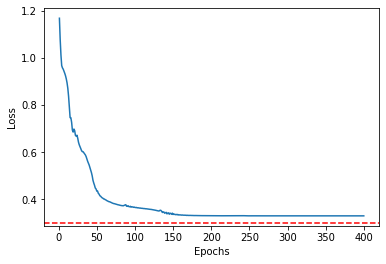

In [45]:
epoch_array = np.arange(1, num_epochs+1, 1)
plt.plot(epoch_array, loss_array)
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.axhline( y=0.3, c='red', ls='--')
plt.show()

In [0]:
x_transform = model(inputs)
latent_space = model.encoder(inputs)

In [37]:
print(np.shape(latent_space))

torch.Size([898, 8, 4, 4])


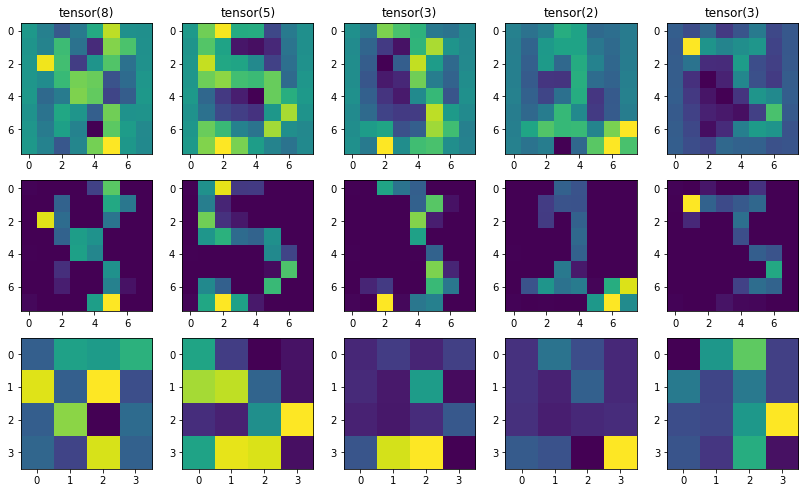

In [38]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 23
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(inputs[i+offset][0].detach().numpy())
    plt.title(str(targets[i+offset]))
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())